In [16]:
import numpy as np
import pandas as pd
import os
from collections import Counter
# used for data visualization
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#used for prediction
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn import svm
cwd = os.getcwd()

In [17]:
# Read data
path = cwd + "/data/SMSSpamCollection"

with open(path) as file:
    data = file.readlines()

data = list(map(lambda line: line.strip().split("\t"),data))
data_df = pd.DataFrame(data,columns=["Tag","Message"])
spam_data_df = data_df[data_df.Tag == "spam"]
ham_data_df = data_df[data_df.Tag == "ham"]
#print(data_df)

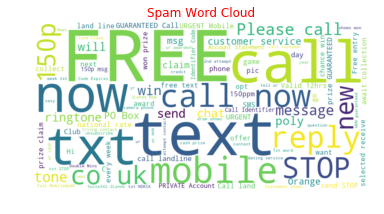

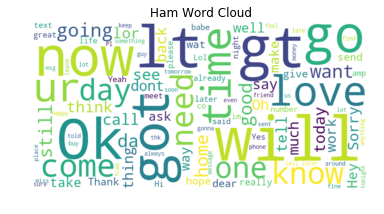

In [18]:
#Plot the Word Cloud for each category
stopwords = set(STOPWORDS)
spam_wc = WordCloud(width=800, 
                    height = 400,
                    stopwords=stopwords,
                    max_words=100, 
                    background_color="white").generate(" ".join(spam_data_df["Message"].tolist()))

ham_wc = WordCloud(width=800, 
                   height = 400,
                   stopwords=stopwords,
                   max_words=100, 
                   background_color="white").generate(" ".join(ham_data_df["Message"].tolist()))

plt.imshow(spam_wc,interpolation='bilinear')
plt.axis("off")
plt.getp(plt.title("Spam Word Cloud"),'text')
plt.setp(plt.title("Spam Word Cloud"),color = 'r')
plt.show()
spam_wc.to_file(cwd+"/img/spam_word_cloud.png")
plt.imshow(ham_wc,interpolation='bilinear')
plt.axis("off")
plt.getp(plt.title("Ham Word Cloud"),'text')
plt.show()
ham_wc.to_file(cwd+"/img/ham_word_cloud.png")

In [19]:
#split data
X_train_data,X_test_data, Y_train_data, Y_test_data =  train_test_split(data_df["Message"], data_df["Tag"], test_size = 0.1)

In [20]:
#convert data
v=DictVectorizer(sparse=False)
train_dictionary= list(map(lambda line:dict(Counter(line)),(list(map(lambda line:line.strip().split(),X_train_data.tolist())))))
train_bag_of_words = v.fit_transform(train_dictionary)

test_dictionary= list(map(lambda line:dict(Counter(line)),(list(map(lambda line:line.strip().split(),X_test_data.tolist())))))
test_bag_of_words = v.transform(test_dictionary)

categories = {"spam":1, "ham":0}
Y_train_data.replace(categories,inplace = True)
Y_test_data.replace(categories,inplace = True)

In [21]:
#Naive bayes
NB_clf = GaussianNB()
NB_clf.fit(train_bag_of_words,Y_train_data.tolist())
Y_NB_pred = NB_clf.predict(test_bag_of_words)
precision_recall_fscore_support(Y_test_data, Y_NB_pred,labels=[0, 1])

(array([0.972103  , 0.63043478]),
 array([0.9301848 , 0.81690141]),
 array([0.95068206, 0.71165644]),
 array([487,  71]))

In [23]:
#SVM
svm_clf = svm.SVC(C=500,gamma="auto")
svm_clf.fit(train_bag_of_words,Y_train_data.tolist())
Y_svm_pred = svm_clf.predict(test_bag_of_words)
precision_recall_fscore_support(Y_test_data, Y_svm_pred,labels=[0, 1])
svm_clf.score(test_bag_of_words,Y_test_data)

0.9767025089605734

In [24]:
precision_recall_fscore_support(Y_test_data, Y_svm_pred,labels=[0, 1])

(array([0.974, 1.   ]),
 array([1.        , 0.81690141]),
 array([0.98682877, 0.89922481]),
 array([487,  71]))

In [26]:
c=2
while c<=1000:
    svm_clf = svm.SVC(C=500,gamma="auto")
    svm_clf.fit(train_bag_of_words,Y_train_data.tolist())
    Y_svm_pred = svm_clf.predict(test_bag_of_words)
    matrix = precision_recall_fscore_support(Y_test_data, Y_svm_pred,labels=[0, 1])
    score = svm_clf.score(test_bag_of_words,Y_test_data)
    print(str(c) + "\t" + str(matrix) + "\t" + str(score))
    c *= 2

500	(array([0.974, 1.   ]), array([1.        , 0.81690141]), array([0.98682877, 0.89922481]), array([487,  71]))	0.9767025089605734
600	(array([0.974, 1.   ]), array([1.        , 0.81690141]), array([0.98682877, 0.89922481]), array([487,  71]))	0.9767025089605734
700	(array([0.974, 1.   ]), array([1.        , 0.81690141]), array([0.98682877, 0.89922481]), array([487,  71]))	0.9767025089605734
800	(array([0.974, 1.   ]), array([1.        , 0.81690141]), array([0.98682877, 0.89922481]), array([487,  71]))	0.9767025089605734
900	(array([0.974, 1.   ]), array([1.        , 0.81690141]), array([0.98682877, 0.89922481]), array([487,  71]))	0.9767025089605734
1000	(array([0.974, 1.   ]), array([1.        , 0.81690141]), array([0.98682877, 0.89922481]), array([487,  71]))	0.9767025089605734
